<a href="https://colab.research.google.com/github/860151558059/Baltimore_Salary_Pred/blob/main/Balitmore_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps
1.Importing the libraries

2.Immporting the dataset

3.Data Cleaning, Data Exploration, Data Manipulation, Data Visualisation

4.EDA - Exploratory data Analysis

5.Spliting the dataset

6.Choosing the model

7.Training the model

8.Testing the model

9.Model Evaluation

10.Export the dataset in .csv format

In [648]:
# 1.Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [609]:
# 2.Immporting the dataset
df = pd.read_csv('/content/drive/MyDrive/DataSet/Balitmore_Salary.csv')

In [610]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [611]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [612]:
df.shape

(18981, 7)

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [614]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Streeter,Catherine F",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [615]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [616]:
# Split the date
df[['hire_month', 'hire_date', 'hire_year']] = df['HireDate'].str.split('/', expand=True)
df.drop(['HireDate'],axis=1,inplace=True)
col_date = df.pop('hire_month')
col_month = df.pop('hire_date')
col_year = df.pop('hire_year')

df.insert(4, 'hire_month', col_date)
df.insert(5, 'hire_date', col_month)
df.insert(6, 'hire_year', col_year)

In [617]:
df.drop(['GrossPay'],axis = 1, inplace=True)

In [618]:
df.columns = df.columns.str.lower()

In [619]:
# remove $ from the annualsalary column
df['annualsalary'] = df['annualsalary'].apply(lambda x: re.sub(r'\$','',x))

In [620]:
df.columns =  df.columns.str.strip()

In [621]:
df.head()

,name,jobtitle,agencyid,agency,hire_month,hire_date,hire_year,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06,10,2013,11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09,25,2006,68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07,23,2009,62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07,24,2013,43999.00


In [622]:
df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hire_month', 'hire_date',
       'hire_year', 'annualsalary'],
      dtype='object')

In [623]:
df.isnull().sum()

,0
name,0
jobtitle,0
agencyid,0
agency,0
hire_month,70
hire_date,70
hire_year,70
annualsalary,0


In [624]:
df = df.dropna(subset = ['hire_date'])

In [625]:
df['annualsalary'] = df['annualsalary'].astype(float).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18911 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18911 non-null  object
 1   jobtitle      18911 non-null  object
 2   agencyid      18911 non-null  object
 3   agency        18911 non-null  object
 4   hire_month    18911 non-null  object
 5   hire_date     18911 non-null  object
 6   hire_year     18911 non-null  object
 7   annualsalary  18911 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.3+ MB


In [626]:
df.isnull().sum()

,0
name,0
jobtitle,0
agencyid,0
agency,0
hire_month,0
hire_date,0
hire_year,0
annualsalary,0


In [627]:
df.agencyid.value_counts()

,count
agencyid,
P04001,316
C90786,276
W02629,193
P04002,191
A99416,166
...,...
W02685,1
W02660,1
W02692,1


In [628]:
# Get the agencyid and the equivalent agency name
df.groupby('agencyid')['agency'].value_counts()

,,count
agencyid,agency,
A01001,Mayors Office,80
A01020,Mayor's Office,11
A01030,Mayors Office,9
A02001,City Council,15
A02002,City Council,51
...,...,...
W02698,Youth Summer,1
W02699,Youth Summer,1
W07900,Youth Temp Adult,66


In [629]:
df.head()

,name,jobtitle,agencyid,agency,hire_month,hire_date,hire_year,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06,10,2013,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09,25,2006,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07,23,2009,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07,24,2013,43999


<Axes: xlabel='jobtitle'>

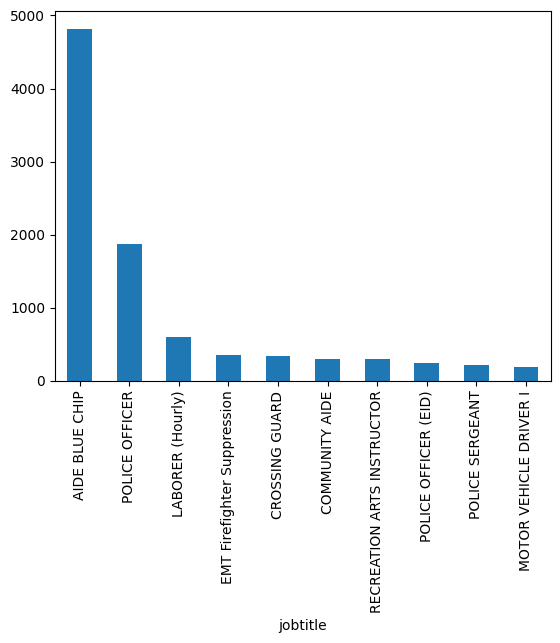

In [630]:
# Top 10 job roles in demand
df.groupby(['jobtitle'])['name'].count().sort_values(ascending = False).head(10).plot.bar()

<Axes: xlabel='jobtitle'>

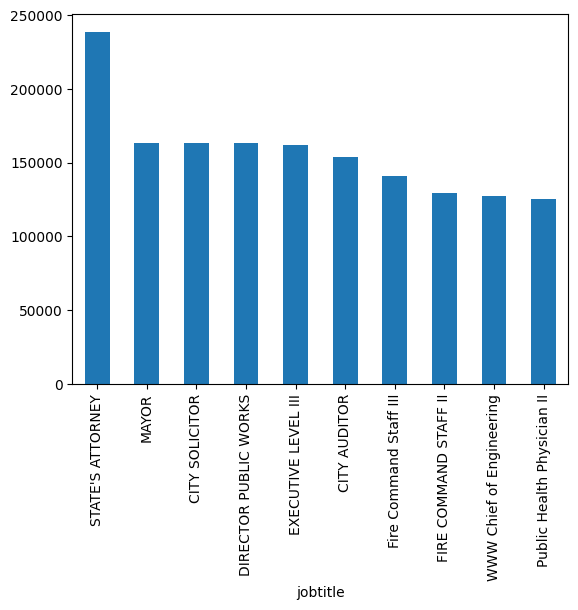

In [631]:
# Top 10 Higeat Salary job roles
df.groupby(['jobtitle'])['annualsalary'].mean().sort_values(ascending = False).head(10).plot.bar()

<Axes: xlabel='agencyid'>

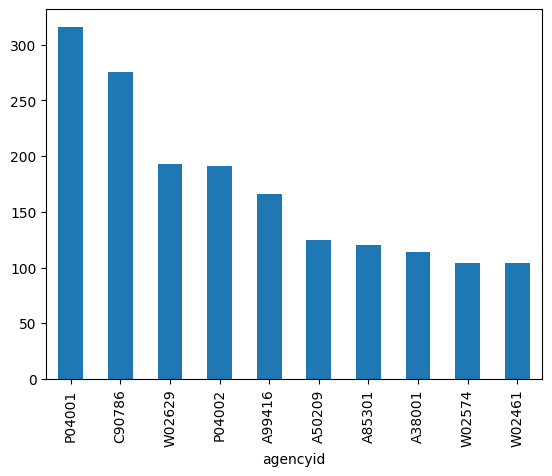

In [632]:
# 10 Agencies Id that has higest number of Employees
df.groupby(['agencyid'])['name'].count().sort_values(ascending = False).head(10).plot.bar()

<Axes: xlabel='hire_year'>

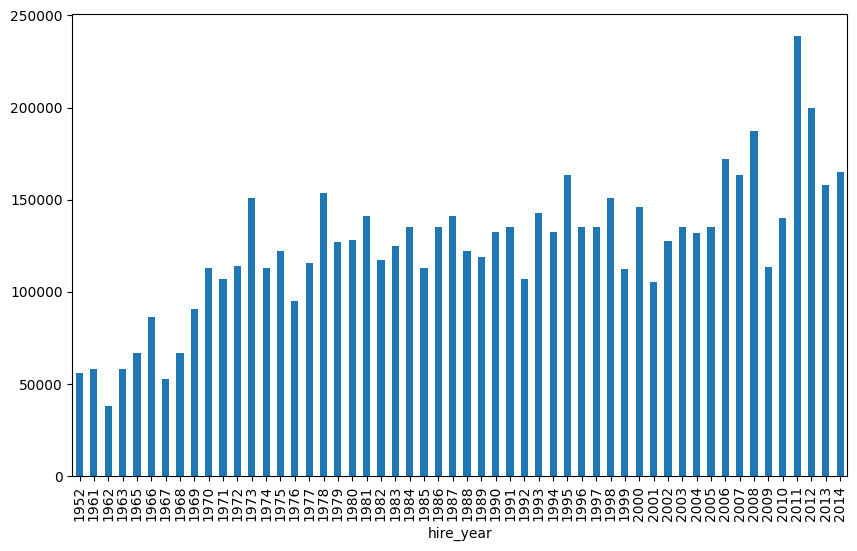

In [633]:
# Plot Highest Salary V/s Year graph
plt.figure(figsize=(10,6))
df.groupby(['hire_year'])['annualsalary'].max().plot.bar()

In [634]:
df.sort_values(by='annualsalary', ascending=False).head(1)

,name,jobtitle,agencyid,agency,hire_month,hire_date,hire_year,annualsalary
1229,"Bernstein,Gregg L",STATE'S ATTORNEY,A29001,States Attorneys Office,01,03,2011,238772


<Axes: xlabel='hire_year'>

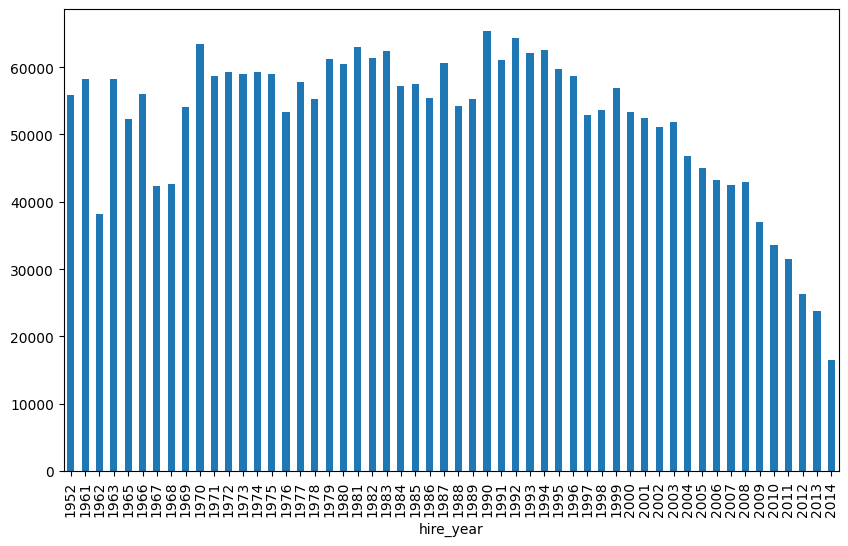

In [635]:
# Average Salary Vs Year graph
plt.figure(figsize=(10,6))
df.groupby(['hire_year'])['annualsalary'].mean().plot.bar()

<Axes: xlabel='hire_month'>

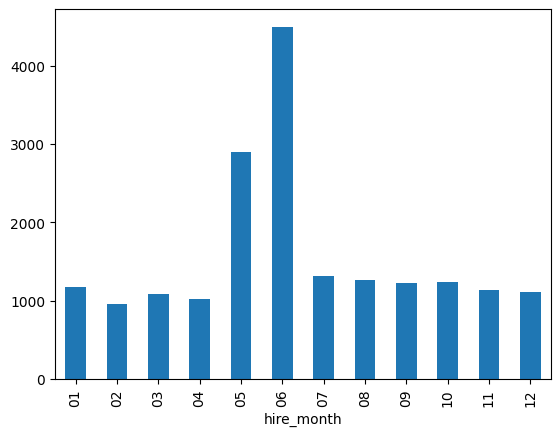

In [636]:
# Graph to check on  which month most of the people are hired
df.groupby(['hire_month'])['name'].count().plot.bar()

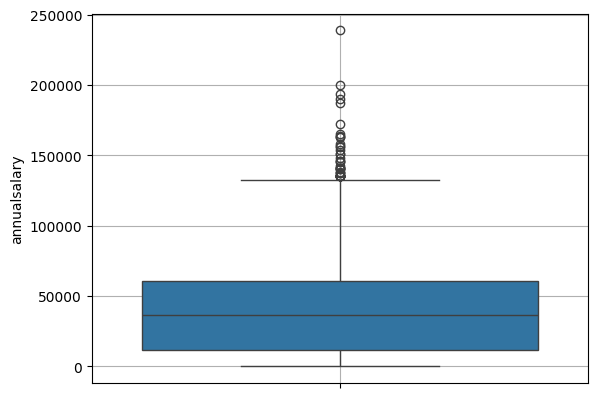

In [638]:
sns.boxplot(df['annualsalary'])
plt.grid()

In [639]:
df['hire_date'] = df['hire_date'].astype(int)
df['hire_month'] = df['hire_month'].astype(int)
df['hire_year'] = df['hire_year'].astype(int)

In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18911 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18911 non-null  object
 1   jobtitle      18911 non-null  object
 2   agencyid      18911 non-null  object
 3   agency        18911 non-null  object
 4   hire_month    18911 non-null  int64 
 5   hire_date     18911 non-null  int64 
 6   hire_year     18911 non-null  int64 
 7   annualsalary  18911 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.8+ MB


# Machine Learning Part

In [641]:
df.head()

,name,jobtitle,agencyid,agency,hire_month,hire_date,hire_year,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,6,10,2013,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10,24,1979,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,9,25,2006,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,7,23,2009,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,7,24,2013,43999


In [642]:
#There are few salaries which are very high from others and few salaries are very less

In [607]:
# One-hot encode the categorical columns
categorical_columns = ['jobtitle', 'agencyid', 'agency']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [643]:
# Define feature columns (exclude target)
X = df_encoded.drop(['annualsalary', 'name'], axis=1)
y = df_encoded['annualsalary']

In [644]:
# Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [645]:
# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [650]:
# Train Support Vector Regression model
model = SVR(kernel='linear')
model.fit(x_train_scaled, y_train)

SVR(kernel='linear')

In [651]:
y_pred = model.predict(x_test_scaled)

In [652]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² Score: 0.8575
Mean Absolute Error (MAE): 4093.02
Mean Squared Error (MSE): 90537432.36
